## Nonlinear ODE

In [1]:
import sys
sys.path.append('../../Py/Build')
from suite import *
sys.path.append('../../Py/GUI')
from suiteGUI import *
import matplotlib.pyplot as plt
import numpy as np

### Example
We show how to solve the following non liner ODE:
$$ \begin{cases}y'(t) = -y^2\\y(0)= 1\end{cases}$$

which has as solution, $y(x) = \frac{1}{x+1}$.

In [2]:
DiffEq = NonLinearODE(1);
DiffEq.setDomain(0.0,2.0)
DiffEq

Non Linear ODE of 1-th order defined on the interval (0.000000,2.000000)

In [3]:
DiffEq.setCoeff(lambda t : 1,lambda Dy,t: -Dy[0]**2)
DiffEq.setIC([1.0])

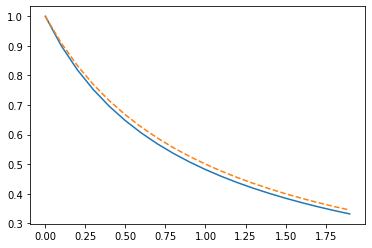

In [4]:
[H,u] = DiffEq.Euler(0.1)
plt.plot(H,u)
plt.plot(H,[1/(h+1) for h in H],"--")

### Example - Gravity Pendulum

In [5]:
DiffEqs = NonLinearODEs(1);
DiffEqs.setDomain(0.0,40.0);
DiffEqs

Non Linear ODE of 1-th order defined on the interval (0.000000,40.000000)

In [6]:
alpha = 1.0;
beta = 0.0;
def f(y,t):
    v = vec(2);
    v.from_Array([y[0][2],-alpha*np.sin(y[0][1])-beta*y[0][2]]);
    return v;
def m(t):
    I = spmat(2,2);
    return I;

$$\begin{bmatrix}\dot{\theta}(t)\\\dot{v}(t)\end{bmatrix}=\begin{bmatrix}v\\ -\alpha \sin(\theta) -\beta v\end{bmatrix}$$

In [7]:
DiffEqs.setCoeff(m,f)
IC = vec(2);
IC.from_Array([0.5,0.0])
DiffEqs.setIC([IC]);

In [8]:
[H, Y] = DiffEqs.Euler(0.1)
Theta = [y[1] for y in Y]
V = [y[2] for y in Y]

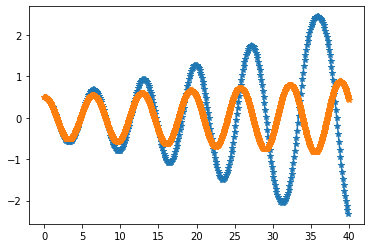

In [9]:
[H2, Y] = DiffEqs.Euler(0.03)
Theta2 = [y[1] for y in Y]
V2 = [y[2] for y in Y]
plt.plot(H,Theta,"*-")
plt.plot(H2,Theta2,"*-")

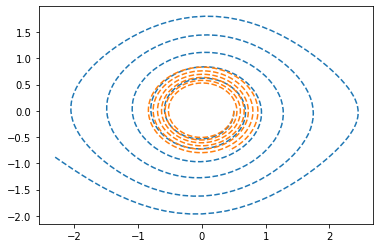

In [10]:
plt.plot(Theta,V,"--")
plt.plot(Theta2,V2,"--")

### Example Runge-Kutta - SIR Model

In the suite library are also implemented Runge-Kutta solver for non linear ODE.

In [11]:
DiffEqs = NonLinearODEs(1); #We declare a first order non linear ODE system
DiffEqs.setDomain(0.0,80.0); #We define the temporal domain where we aim to solve the system
DiffEqs

Non Linear ODE of 1-th order defined on the interval (0.000000,80.000000)

In [12]:
beta = 0.5; # Rate of contact between infcted and uninfected individuals
gamma = 0.1; #1/d where d are the days during which the disease is acting

#We rewrite the SIR ODEs in the form 
# X'(t) = F(t,X(t))

def f(y,t):
    v = vec(2);
    v.from_Array([-beta*y[0][1]*y[0][2],beta*y[0][1]*y[0][2]-gamma*y[0][2]]);
    return v;

#We introduce an indentity mass matrix that will not be used, but neded for the code.
def m(t):
    I = spmat(2,2);
    return I;

In [13]:
DiffEqs.setCoeff(m,f) # Set the parameters that define the non linear ODE
IC = vec(2); #Init. vector with initial conditions
IC.from_Array([0.99,0.01]) 
DiffEqs.setIC([IC]); # Setting initial conditions. 

In [14]:
[H, Y] = DiffEqs.RK(0.01,2) #Calling Runge-Kutta method to solve the ode, option 1 tell to use midpoint rule.
S = [y[1] for y in Y] #Extracting Susceptible individuals rate from the solution
I = [y[2] for y in Y] #Extracting Infected individuals rate from the solution
R = [1-y[1]-y[2] for y in Y] #Computing removed individuals rate.

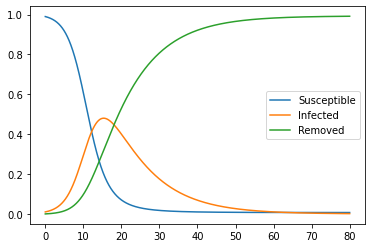

In [15]:
plt.plot(H,S,"-")
plt.plot(H,I,"-")
plt.plot(H,R,"-")
plt.legend(["Susceptible","Infected","Removed"])

In [16]:
print("The maximum value for I(t) is {} and it is rached on the {}th day".format(max(I),H[I.index(max(I))]))

The maximum value for I(t) is 0.48012243860292586 and it is rached on the 15.34th day


Lets now have a look a the effect of the social distancing measure varying $\beta$ in $[0.01,0.5]$.

In [17]:
Beta = np.linspace(0.01,0.5,60);
#We define a function that solve the SIR model with parameter beta using RK method.
def SIR(beta):
    DiffEqs = NonLinearODEs(1); #We declare a first order non linear ODE system
    DiffEqs.setDomain(0.0,800.0); #We define the temporal domain where we aim to solve the system
    gamma = 0.1; #1/d where d are the days during which the disease is acting

    #We rewrite the SIR ODEs in the form 
    # X'(t) = F(t,X(t))

    def f(y,t):
        v = vec(2);
        v.from_Array([-beta*y[0][1]*y[0][2],beta*y[0][1]*y[0][2]-gamma*y[0][2]]);
        return v;

    #We introduce an indentity mass matrix that will not be used, but neded for the code.
    def m(t):
        I = spmat(2,2);
        return I;
    DiffEqs.setCoeff(m,f) # Set the parameters that define the non linear ODE
    IC = vec(2); #Init. vector with initial conditions
    IC.from_Array([0.99,0.01]) 
    DiffEqs.setIC([IC]); # Setting initial conditions. 
    [H, Y] = DiffEqs.RK(0.01,2) #Calling Runge-Kutta method to solve the ode, option 1 tell to use midpoint rule.
    S = [y[1] for y in Y] #Extracting Susceptible individuals rate from the solution
    I = [y[2] for y in Y] #Extracting Infected individuals rate from the solution
    R = [1-y[1]-y[2] for y in Y] #Computing removed individuals rate.
    T = [ n for n,i in enumerate(I) if i<1e-5 ][0] #Finding when infections end, i.e. I(t) < 10^(-5)
    #print(H[T], I[T])
    return [beta/gamma, I[-1],max(I),R[T],H[T]]

betagamma = []
Iend = [];
Imax = [];
Aend = [];
Tend = [];
for beta in Beta:
    X = SIR(beta);
    betagamma = betagamma +[X[0]];
    Iend = Iend + [X[1]]
    Imax = Imax + [X[2]]
    Aend = Aend + [1-X[3]]
    Tend = Tend + [X[4]]
max(Iend)

7.542119213337844e-07

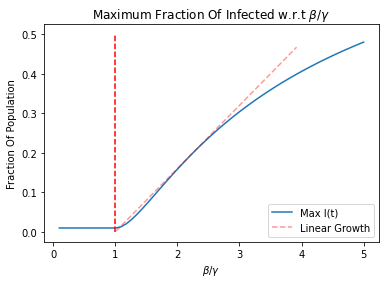

In [18]:
plt.plot(betagamma,Imax)
plt.plot([b for b in betagamma if 4 > b >1],[0.16*(b-1) for b in betagamma if 4 > b > 1],"r--",alpha=0.4)
plt.plot([1,1],[0.0,0.5],"r--")
plt.title(r"Maximum Fraction Of Infected w.r.t $\beta/\gamma$")
plt.ylabel("Fraction Of Population")
plt.xlabel(r"$\beta/\gamma$")
plt.legend(["Max I(t)","Linear Growth"])

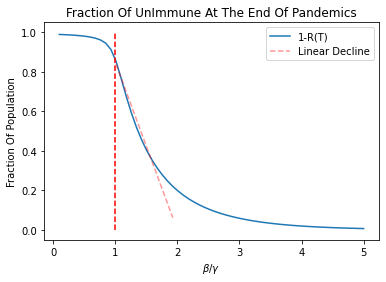

In [19]:
plt.plot(betagamma,Aend)
plt.plot([b for b in betagamma if 2 > b >1],[1.7-0.85*b for b in betagamma if 2 > b > 1],"r--",alpha=0.4)
plt.plot([1,1],[0.0,1.0],"r--")
plt.title(r"Fraction Of UnImmune At The End Of Pandemics")
plt.ylabel("Fraction Of Population")
plt.xlabel(r"$\beta/\gamma$")
plt.legend(["1-R(T)","Linear Decline"])

Text(0.5, 0, '$\\beta/\\gamma$')

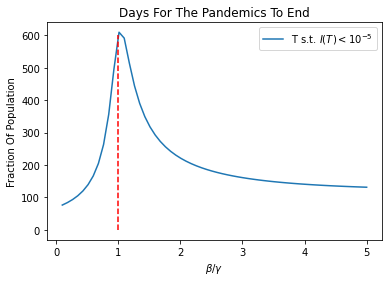

In [20]:
plt.plot(betagamma,Tend)
plt.plot([1,1],[0.0,600],"r--")
plt.title(r"Days For The Pandemics To End")
plt.legend([r"T s.t. $I(T) < 10^{-5}$"])
plt.ylabel("Fraction Of Population")
plt.xlabel(r"$\beta/\gamma$")

### Example - Susceptible, Infected, Removed and Vaccinated (SIRV) Model

In [21]:
DiffEqs = NonLinearODEs(1); #We declare a first order non linear ODE system
DiffEqs.setDomain(0.0,80.0); #We define the temporal domain where we aim to solve the system
beta = 0.5; # Rate of contact between infcted and uninfected individuals
gamma = 0.1; #1/d where d are the days during which the disease is acting

#Defining the rat of vaccination function v(t)
def v(S):
    v0 = 0.01
    if S>0.0:
        return v0;
    else:
        return 0.0;
def delta(S):
    if S>0:
        return S;
    else:
        return 0;

#We rewrite the SIR ODEs in the form 
# X'(t) = F(t,X(t))
def f(y,t):
    w = vec(3);
    w.from_Array([-beta*delta(y[0][1])*y[0][2]-v(y[0][1]),beta*delta(y[0][1])*y[0][2]-gamma*y[0][2],v(y[0][1])]);
    return w;

#We introduce an indentity mass matrix that will not be used, but neded for the code.
def m(t):
    I = spmat(3,3);
    return I;
DiffEqs.setCoeff(m,f) # Set the parameters that define the non linear ODE
IC = vec(3); #Init. vector with initial conditions
IC.from_Array([0.99,0.01,0.0]) 
DiffEqs.setIC([IC]); # Setting initial conditions. 
[H, Y] = DiffEqs.RK(0.01,2) #Calling Runge-Kutta method to solve the ode, option 1 tell to use midpoint rule.
S = [y[1] if y[1] > 0 else 0 for y in Y] #Extracting Susceptible individuals rate from the solution
I = [y[2] if y[2] > 0 else 0 for y in Y] #Extracting Infected individuals rate from the solution
R = [1-y[1]-y[2]-y[3] for y in Y] #Computing removed individuals rate.
V = [y[3] if y[3] > 0 else 0 for y in Y] #Extracting Vaccinated individuals rate from the solution

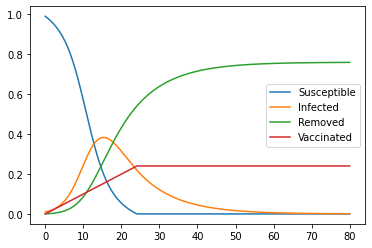

In [22]:
plt.plot(H,S,"-")
plt.plot(H,I,"-")
plt.plot(H,R,"-")
plt.plot(H,V,"-")
plt.legend(["Susceptible","Infected","Removed","Vaccinated"])

In [23]:
V0 = np.linspace(0,0.1,60);
def SIRV(v0):
    DiffEqs = NonLinearODEs(1); #We declare a first order non linear ODE system
    DiffEqs.setDomain(0.0,800.0); #We define the temporal domain where we aim to solve the system
    beta = 0.5; # Rate of contact between infcted and uninfected individuals
    gamma = 0.1; #1/d where d are the days during which the disease is acting

    #Defining the rat of vaccination function v(t)
    def v(S):
        if S>0.0:
            return v0;
        else:
            return 0.0;
    def delta(S):
        if S>0:
            return S;
        else:
            return 0;

    #We rewrite the SIR ODEs in the form 
    # X'(t) = F(t,X(t))
    def f(y,t):
        w = vec(3);
        w.from_Array([-beta*delta(y[0][1])*y[0][2]-v(y[0][1]),beta*delta(y[0][1])*y[0][2]-gamma*y[0][2],v(y[0][1])]);
        return w;

    #We introduce an indentity mass matrix that will not be used, but neded for the code.
    def m(t):
        I = spmat(3,3);
        return I;
    DiffEqs.setCoeff(m,f) # Set the parameters that define the non linear ODE
    IC = vec(3); #Init. vector with initial conditions
    IC.from_Array([0.99,0.01,0.0]) 
    DiffEqs.setIC([IC]); # Setting initial conditions. 
    [H, Y] = DiffEqs.RK(0.01,2) #Calling Runge-Kutta method to solve the ode, option 1 tell to use midpoint rule.
    S = [y[1] if y[1] > 0 else 0 for y in Y] #Extracting Susceptible individuals rate from the solution
    I = [y[2] if y[2] > 0 else 0 for y in Y] #Extracting Infected individuals rate from the solution
    R = [1-y[1]-y[2]-y[3] for y in Y] #Computing removed individuals rate.
    V = [y[3] if y[3] > 0 else 0 for y in Y] #Extracting Vaccinated individuals rate from the solution
    T = [ n for n,i in enumerate(I) if i<1e-5 ][0] #Finding when infections end, i.e. I(t) < 10^(-5)
    return [v0, I[-1],max(I),R[T],H[T]]
betagamma = []
Iend = [];
Imax = [];
Aend = [];
Tend = [];
for v0 in V0:
    X = SIRV(v0);
    betagamma = betagamma +[X[0]];
    Iend = Iend + [X[1]]
    Imax = Imax + [X[2]]
    Aend = Aend + [1-X[3]]
    Tend = Tend + [X[4]]
max(Iend)

9.4650901459787e-34

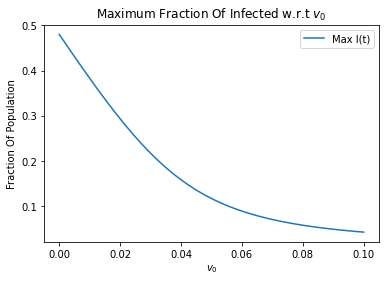

In [24]:
plt.plot(betagamma,Imax)
plt.title(r"Maximum Fraction Of Infected w.r.t $v_0$")
plt.ylabel("Fraction Of Population")
plt.xlabel(r"$v_0$")
plt.legend(["Max I(t)","Linear Growth"])

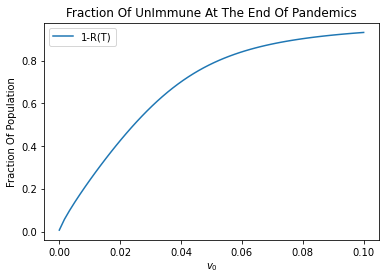

In [25]:
plt.plot(betagamma,Aend)
plt.title(r"Fraction Of UnImmune At The End Of Pandemics")
plt.ylabel("Fraction Of Population")
plt.xlabel(r"$v_0$")
plt.legend(["1-R(T)","Linear Decline"])

Text(0.5, 0, 'v_0$')

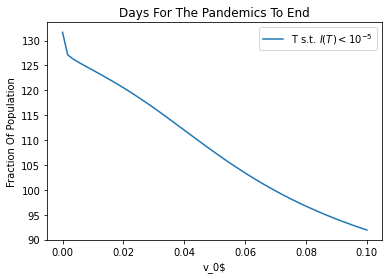

In [26]:
plt.plot(betagamma,Tend)
plt.title(r"Days For The Pandemics To End")
plt.legend([r"T s.t. $I(T) < 10^{-5}$"])
plt.ylabel("Fraction Of Population")
plt.xlabel(r"v_0$")